In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# lets first generate a dataset of 100 points this time
np.random.seed(1)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

In [ ]:
X.shape,y.shape

((1000, 1), (1000, 1))

In [ ]:
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

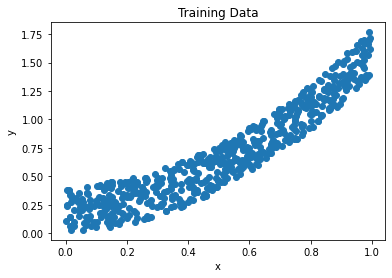

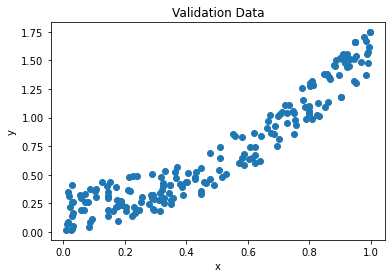

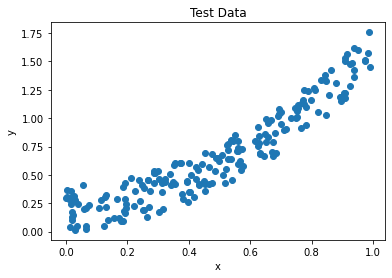

In [ ]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_val, y_val)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

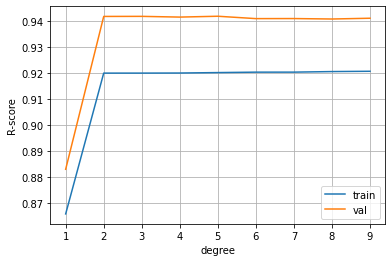

In [ ]:
# Train and Validatation without hyper param tuning. Just by controlling the degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# let's do hyperparameter tuning on degress. 

max_degree = 10 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    val_score = polyreg_scaled.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
plt.figure()
plt.plot(list(range(1, 10)), train_scores, label="train")
plt.plot(list(range(1, 10)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [ ]:
val_scores[:5]

[0.8829712557366646,
 0.9417416809630602,
 0.9417714186425903,
 0.9414930183981132,
 0.9418169131472033]

Degree = 3 is the best degree.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

train_scores = []
val_scores = []
scaler = StandardScaler()
for alpha in range(0,10):
  polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(alpha))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  val_score = polyreg_scaled.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)
print(val_scores[:5])

[0.9284573369217886, 0.9410104818514041, 0.9409590581249001, 0.9409056593572074, 0.9408551351281218]


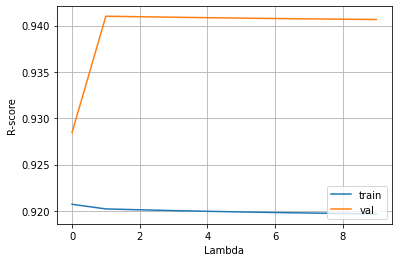

In [ ]:
plt.figure()
plt.plot(list(range(10)), train_scores, label="train")
plt.plot(list(range(10)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

Lambda = 1 is the best Lambda.

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(1))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
print(train_score)
val_score = polyreg_scaled.score(X_val, y_val)
print(val_score)

0.9202220379350171
0.9410104818514041


In [ ]:
# I will report this number to my manager. 
polyreg_scaled.score(X_test, y_test)

0.9197434779081431

# K-Fold Cross Validation

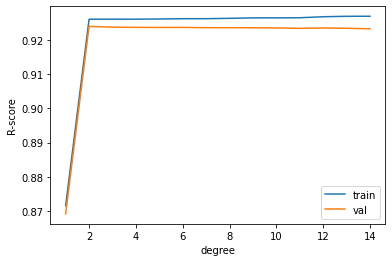

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

degrees = 15 # number of data-points
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds
    
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
    
        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model
        
        train_score = polyreg_scaled.score(X_train, y_train)
        val_score = polyreg_scaled.score(X_val, y_val)
        
        fold_train_scores.append(train_score) 
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores) 
    val_score = np.mean(fold_val_scores)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1, 15)), train_scores, label="train")
plt.plot(list(range(1, 15)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()